# Montamos el Colaboratory

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ProyectoIA/')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ProyectoIA


# Cargamos los dataset que utilizaremos

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df_2019 = pd.read_csv('data/Jan_2019_ontime.csv')
df_2020 = pd.read_csv('data/Jan_2020_ontime.csv')

# Observamos que tienen los dataset

In [5]:
df_2019.head()
df_2019

DAY_OF_MONTH  DAY_OF_WEEK  ... DISTANCE  Unnamed: 21
0                  1            2  ...    300.0          NaN
1                  1            2  ...    596.0          NaN
2                  1            2  ...    229.0          NaN
3                  1            2  ...    223.0          NaN
4                  1            2  ...    579.0          NaN
...              ...          ...  ...      ...          ...
583980            31            4  ...   3801.0          NaN
583981            31            4  ...    129.0          NaN
583982            31            4  ...    129.0          NaN
583983            31            4  ...    129.0          NaN
583984            31            4  ...    129.0          NaN

[583985 rows x 22 columns]

In [6]:
df_2020.head()
df_2020

DAY_OF_MONTH  DAY_OF_WEEK  ... DISTANCE  Unnamed: 21
0                  1            3  ...    174.0          NaN
1                  1            3  ...    585.0          NaN
2                  1            3  ...    631.0          NaN
3                  1            3  ...    253.0          NaN
4                  1            3  ...   1157.0          NaN
...              ...          ...  ...      ...          ...
607341            31            5  ...    443.0          NaN
607342            31            5  ...    509.0          NaN
607343            31            5  ...    610.0          NaN
607344            31            5  ...    589.0          NaN
607345            31            5  ...    589.0          NaN

[607346 rows x 22 columns]

In [7]:
data=pd.concat([df_2019,df_2020]) #unimos los dos dataset
data

DAY_OF_MONTH  DAY_OF_WEEK  ... DISTANCE  Unnamed: 21
0                  1            2  ...    300.0          NaN
1                  1            2  ...    596.0          NaN
2                  1            2  ...    229.0          NaN
3                  1            2  ...    223.0          NaN
4                  1            2  ...    579.0          NaN
...              ...          ...  ...      ...          ...
607341            31            5  ...    443.0          NaN
607342            31            5  ...    509.0          NaN
607343            31            5  ...    610.0          NaN
607344            31            5  ...    589.0          NaN
607345            31            5  ...    589.0          NaN

[1191331 rows x 22 columns]

In [8]:
print(data['Unnamed: 21'].isnull().sum()) #miramos cuantos Null tiene la columna 22

1191331


In [9]:
data.info() #informacion del dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15          

In [10]:
#verificamos cuantos null tiene cada columna
column_names = data.columns
j=0
for i in data.columns:
    print("  {} Tiene {} Muestras Nulas " .format(data.columns[j],data[i].isnull().sum()))
    j=j+1

  DAY_OF_MONTH Tiene 0 Muestras Nulas 
  DAY_OF_WEEK Tiene 0 Muestras Nulas 
  OP_UNIQUE_CARRIER Tiene 0 Muestras Nulas 
  OP_CARRIER_AIRLINE_ID Tiene 0 Muestras Nulas 
  OP_CARRIER Tiene 0 Muestras Nulas 
  TAIL_NUM Tiene 3241 Muestras Nulas 
  OP_CARRIER_FL_NUM Tiene 0 Muestras Nulas 
  ORIGIN_AIRPORT_ID Tiene 0 Muestras Nulas 
  ORIGIN_AIRPORT_SEQ_ID Tiene 0 Muestras Nulas 
  ORIGIN Tiene 0 Muestras Nulas 
  DEST_AIRPORT_ID Tiene 0 Muestras Nulas 
  DEST_AIRPORT_SEQ_ID Tiene 0 Muestras Nulas 
  DEST Tiene 0 Muestras Nulas 
  DEP_TIME Tiene 23016 Muestras Nulas 
  DEP_DEL15 Tiene 23054 Muestras Nulas 
  DEP_TIME_BLK Tiene 0 Muestras Nulas 
  ARR_TIME Tiene 24136 Muestras Nulas 
  ARR_DEL15 Tiene 26100 Muestras Nulas 
  CANCELLED Tiene 0 Muestras Nulas 
  DIVERTED Tiene 0 Muestras Nulas 
  DISTANCE Tiene 0 Muestras Nulas 
  Unnamed: 21 Tiene 1191331 Muestras Nulas 


# Vamos a preprocesar el dataset

In [11]:
data = data.drop(['Unnamed: 21'],axis=1) #boramos la columna 22 debido a que todos sus datos son null
data.shape

(1191331, 21)

In [12]:
data = data.dropna(subset=['TAIL_NUM']) # borramos las filas del dataset donde el numero de la cola fuera nulo
data.shape

(1188090, 21)

In [13]:
# llenaremos los valores null con la media de cada columna correspondiente

from sklearn.impute import SimpleImputer
media = SimpleImputer(missing_values=np.nan,strategy='mean')
#HORA DE SALIDA

data['DEP_TIME'] = media.fit_transform(data[['DEP_TIME']])
#HORA DE LLEGADA

data['ARR_TIME'] = media.fit_transform(data[['ARR_TIME']])

In [14]:
# Para rellenar los null supondremos que el vuelo a la hora de salida no se demoro 15 o mas minutos

data['DEP_DEL15'] = data['DEP_DEL15'].replace(np.NaN,0)

In [15]:
# Para rellenar los null supondremos que el vuelo a la hora de llegada no se demoro 15 o mas minutos

data['ARR_DEL15'] = data['ARR_DEL15'].replace(np.NaN,0)

In [16]:
# confirmamos que todas las columnas no tengan ningun dato nulo

column_names = data.columns
j=0
for i in data.columns:
    print("  {} Tiene {} Muestras Nulas " .format(data.columns[j],data[i].isnull().sum()))
    j=j+1

  DAY_OF_MONTH Tiene 0 Muestras Nulas 
  DAY_OF_WEEK Tiene 0 Muestras Nulas 
  OP_UNIQUE_CARRIER Tiene 0 Muestras Nulas 
  OP_CARRIER_AIRLINE_ID Tiene 0 Muestras Nulas 
  OP_CARRIER Tiene 0 Muestras Nulas 
  TAIL_NUM Tiene 0 Muestras Nulas 
  OP_CARRIER_FL_NUM Tiene 0 Muestras Nulas 
  ORIGIN_AIRPORT_ID Tiene 0 Muestras Nulas 
  ORIGIN_AIRPORT_SEQ_ID Tiene 0 Muestras Nulas 
  ORIGIN Tiene 0 Muestras Nulas 
  DEST_AIRPORT_ID Tiene 0 Muestras Nulas 
  DEST_AIRPORT_SEQ_ID Tiene 0 Muestras Nulas 
  DEST Tiene 0 Muestras Nulas 
  DEP_TIME Tiene 0 Muestras Nulas 
  DEP_DEL15 Tiene 0 Muestras Nulas 
  DEP_TIME_BLK Tiene 0 Muestras Nulas 
  ARR_TIME Tiene 0 Muestras Nulas 
  ARR_DEL15 Tiene 0 Muestras Nulas 
  CANCELLED Tiene 0 Muestras Nulas 
  DIVERTED Tiene 0 Muestras Nulas 
  DISTANCE Tiene 0 Muestras Nulas 


# Observaremos que tan correlacionadas estan las variables entre ellas

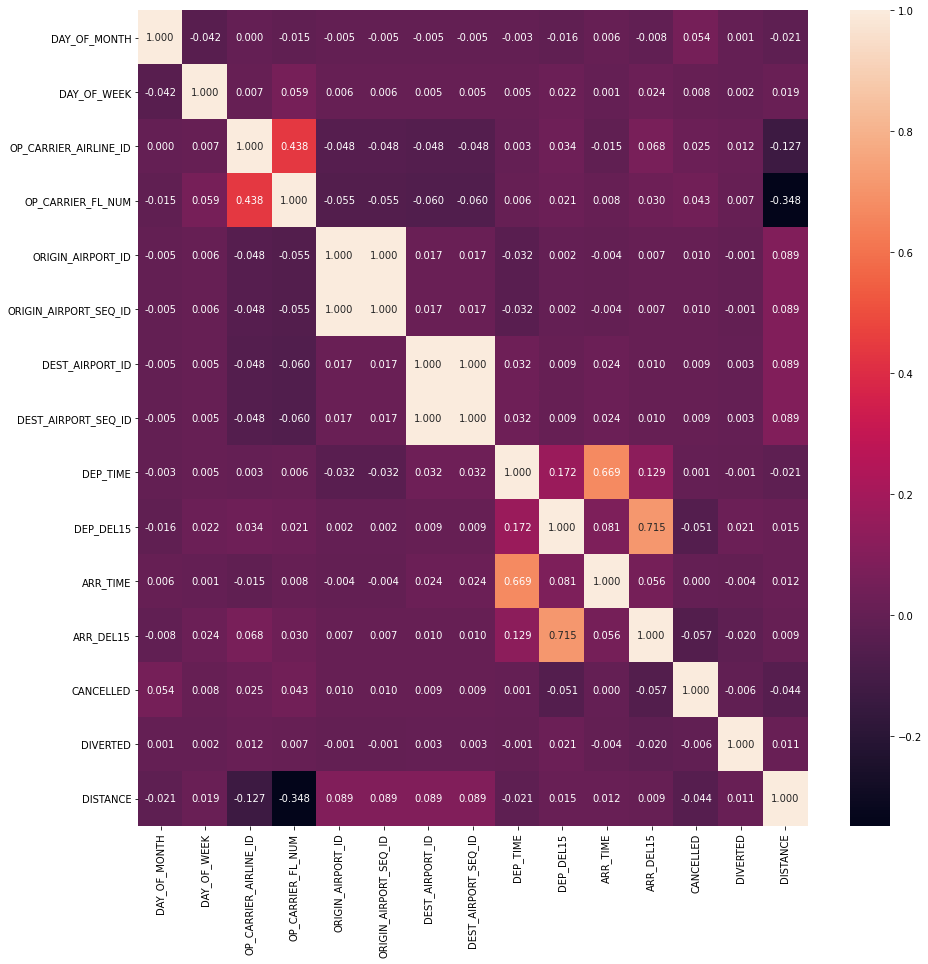

In [17]:
import seaborn as sns
f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt=".3f",ax=ax)
plt.show()

In [18]:
# Observamos que DEST_AIRPORT_SEQ_ID es igual a DEST_AIRPORT_ID, asi que elimnamos una de las columnas. asi mismo pasa con las variables ORIGIN_AIRPORT_SEQ_ID y ORIGIN_AIRPORT_ID

data = data.drop(['DEST_AIRPORT_SEQ_ID'],axis=1)
data = data.drop(['ORIGIN_AIRPORT_SEQ_ID'],axis=1)

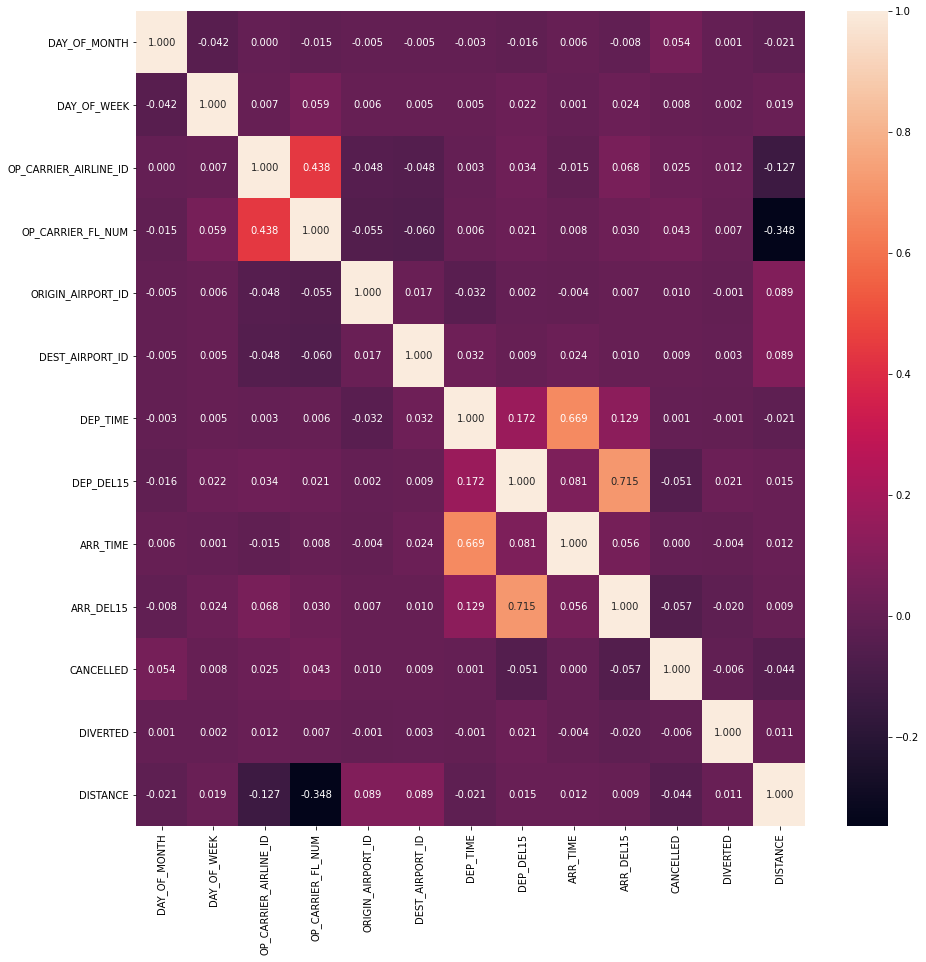

In [19]:
import seaborn as sns
f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt=".3f",ax=ax)
plt.show()

In [20]:
data['DEP_TIME'] = data['DEP_TIME'].astype('int64')
data['DEP_DEL15'] = data['DEP_DEL15'].astype('int64')
data['ARR_TIME'] = data['ARR_TIME'].astype('int64')
data['ARR_DEL15'] = data['ARR_DEL15'].astype('int64')
data['CANCELLED'] = data['CANCELLED'].astype('int64')
data['DIVERTED'] = data['DIVERTED'].astype('int64')
data['DISTANCE'] = data['DISTANCE'].astype('int64')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188090 entries, 0 to 607345
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   DAY_OF_MONTH           1188090 non-null  int64 
 1   DAY_OF_WEEK            1188090 non-null  int64 
 2   OP_UNIQUE_CARRIER      1188090 non-null  object
 3   OP_CARRIER_AIRLINE_ID  1188090 non-null  int64 
 4   OP_CARRIER             1188090 non-null  object
 5   TAIL_NUM               1188090 non-null  object
 6   OP_CARRIER_FL_NUM      1188090 non-null  int64 
 7   ORIGIN_AIRPORT_ID      1188090 non-null  int64 
 8   ORIGIN                 1188090 non-null  object
 9   DEST_AIRPORT_ID        1188090 non-null  int64 
 10  DEST                   1188090 non-null  object
 11  DEP_TIME               1188090 non-null  int64 
 12  DEP_DEL15              1188090 non-null  int64 
 13  DEP_TIME_BLK           1188090 non-null  object
 14  ARR_TIME               1188090 non-

In [22]:
freq = data['CANCELLED'].value_counts() 
print(freq) 


0    1167677
1      20413
Name: CANCELLED, dtype: int64


In [23]:
daticos0 = data[data['CANCELLED'] == 0].sample(n=20410, replace = True)
daticos0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20410 entries, 354437 to 430463
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DAY_OF_MONTH           20410 non-null  int64 
 1   DAY_OF_WEEK            20410 non-null  int64 
 2   OP_UNIQUE_CARRIER      20410 non-null  object
 3   OP_CARRIER_AIRLINE_ID  20410 non-null  int64 
 4   OP_CARRIER             20410 non-null  object
 5   TAIL_NUM               20410 non-null  object
 6   OP_CARRIER_FL_NUM      20410 non-null  int64 
 7   ORIGIN_AIRPORT_ID      20410 non-null  int64 
 8   ORIGIN                 20410 non-null  object
 9   DEST_AIRPORT_ID        20410 non-null  int64 
 10  DEST                   20410 non-null  object
 11  DEP_TIME               20410 non-null  int64 
 12  DEP_DEL15              20410 non-null  int64 
 13  DEP_TIME_BLK           20410 non-null  object
 14  ARR_TIME               20410 non-null  int64 
 15  ARR_DEL15    

In [24]:
daticos1 = data[data['CANCELLED'] == 1].sample(n=20410, replace = True)
daticos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20410 entries, 537897 to 444815
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DAY_OF_MONTH           20410 non-null  int64 
 1   DAY_OF_WEEK            20410 non-null  int64 
 2   OP_UNIQUE_CARRIER      20410 non-null  object
 3   OP_CARRIER_AIRLINE_ID  20410 non-null  int64 
 4   OP_CARRIER             20410 non-null  object
 5   TAIL_NUM               20410 non-null  object
 6   OP_CARRIER_FL_NUM      20410 non-null  int64 
 7   ORIGIN_AIRPORT_ID      20410 non-null  int64 
 8   ORIGIN                 20410 non-null  object
 9   DEST_AIRPORT_ID        20410 non-null  int64 
 10  DEST                   20410 non-null  object
 11  DEP_TIME               20410 non-null  int64 
 12  DEP_DEL15              20410 non-null  int64 
 13  DEP_TIME_BLK           20410 non-null  object
 14  ARR_TIME               20410 non-null  int64 
 15  ARR_DEL15    

In [25]:
data=pd.concat([daticos0,daticos1])
data

DAY_OF_MONTH  DAY_OF_WEEK  ... DIVERTED  DISTANCE
354437            19            6  ...        0       594
3376               1            2  ...        0       370
556607            30            3  ...        0       581
228405            12            7  ...        0      1036
553214            30            3  ...        0      1046
...              ...          ...  ...      ...       ...
417664            23            3  ...        0       489
144698             8            2  ...        0       689
562136            30            3  ...        0      1120
340827            18            5  ...        0       711
444815            23            4  ...        0       423

[40820 rows x 19 columns]

In [26]:
freq = data['CANCELLED'].value_counts() 
print(freq) 

1    20410
0    20410
Name: CANCELLED, dtype: int64


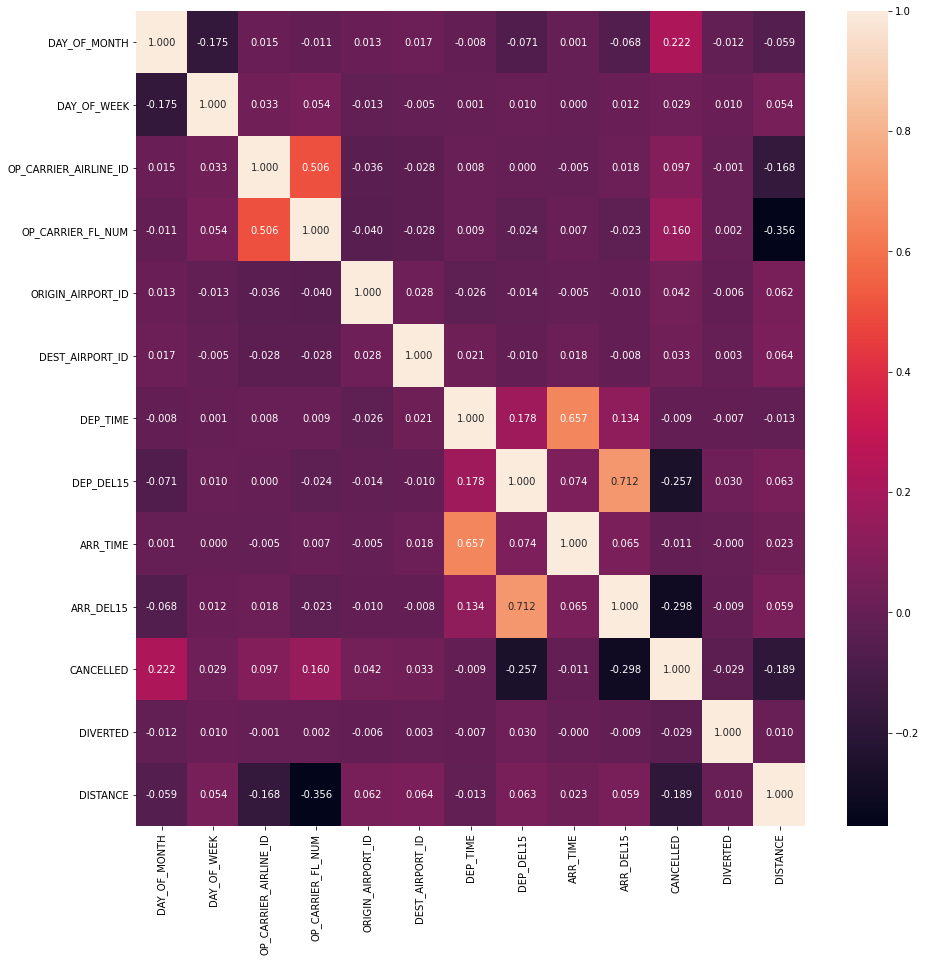

In [27]:
f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt=".3f",ax=ax)
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40820 entries, 354437 to 444815
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DAY_OF_MONTH           40820 non-null  int64 
 1   DAY_OF_WEEK            40820 non-null  int64 
 2   OP_UNIQUE_CARRIER      40820 non-null  object
 3   OP_CARRIER_AIRLINE_ID  40820 non-null  int64 
 4   OP_CARRIER             40820 non-null  object
 5   TAIL_NUM               40820 non-null  object
 6   OP_CARRIER_FL_NUM      40820 non-null  int64 
 7   ORIGIN_AIRPORT_ID      40820 non-null  int64 
 8   ORIGIN                 40820 non-null  object
 9   DEST_AIRPORT_ID        40820 non-null  int64 
 10  DEST                   40820 non-null  object
 11  DEP_TIME               40820 non-null  int64 
 12  DEP_DEL15              40820 non-null  int64 
 13  DEP_TIME_BLK           40820 non-null  object
 14  ARR_TIME               40820 non-null  int64 
 15  ARR_DEL15    

# Ahora empezaremos a intentar predecir

In [29]:
datas = np.random.permutation(data.values)
datas.shape
X = datas[:, [0,3]]
y = datas[:, 16] #columna donde se sabe si el vuelo fue cancelado o no

X=X.astype('int')
y=y.astype('int')

In [30]:
print(X.shape)
print(y.shape)

(40820, 2)
(40820,)


In [31]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

est = GaussianNB()

est.fit(X_train, y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.598
accuracy 0.596 (+/- 0.00632)
tpr      0.667 (+/- 0.01538)
tnr      0.525 (+/- 0.01136)


In [34]:
from sklearn.tree import DecisionTreeClassifier

est = DecisionTreeClassifier()

est.fit(X_train, y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

print(est.feature_importances_)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.741
[0.5043568 0.4956432]
accuracy 0.741 (+/- 0.00366)
tpr      0.798 (+/- 0.01460)
tnr      0.687 (+/- 0.01290)


In [35]:
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier(max_depth=5)

est.fit(X_train, y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

print(est.feature_importances_)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.683
[0.51775317 0.48224683]
accuracy 0.688 (+/- 0.00736)
tpr      0.784 (+/- 0.00806)
tnr      0.591 (+/- 0.01034)


In [36]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=X_train[0].shape),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 10,786
Trainable params: 10,786
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
893/893 [==============================] - 2s 1ms/step - loss: 0.7045 - accuracy: 0.5027
Epoch 2/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6966 - accuracy: 0.5107
Epoch 3/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6979 - accuracy: 0.4984
Epoch 4/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6966 - accuracy: 0.5059
Epoch 5/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6964 - accuracy: 0.4988
Epoch 6/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.4979
Epoch 7/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.4984
Epoch 8/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.4968
Epoch 9/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.5021
Epoch 10/10
893/893 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5009

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

383/383 [==============================] - 1s 978us/step - loss: 0.6931 - accuracy: 0.5034
Test accuracy: 0.5034297108650208


In [ ]:
from sklearn.svm import SVC

est = SVC(kernel = 'linear')

est.fit(X_train, y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.596
